## Importing Libraries

In [1]:
import pandas as ps
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset

Though I dont have a dataset I am creating one so that i can show multi linear regression among the features that is how the columns affecting the target variable.

In [2]:
import pandas as pd
import numpy as np

# Define the number of samples to generate
num_samples = 1000

# Define the ranges for hours, age, internet and marks
hours_range = [1, 9]
age_range = [10, 35]
internet_range = [0, 1]
marks_range = [0, 98]

# Generate random values for each feature
hours = np.random.uniform(hours_range[0], hours_range[1], num_samples)
age = np.random.randint(age_range[0], age_range[1]+1, num_samples)
internet = np.random.randint(internet_range[0], internet_range[1]+1, num_samples)
marks = np.random.normal(loc=(hours*5 + age*2 + internet*10), scale=10, size=num_samples)
marks = np.clip(marks, marks_range[0], marks_range[1]) # Clip values outside of range

# Create a DataFrame with the generated data
df = pd.DataFrame({'hours': hours, 'age': age, 'internet': internet, 'marks': marks})

# Print the first few rows of the DataFrame
print(df.head())


      hours  age  internet      marks
0  1.583932   27         0  54.406893
1  7.642267   22         0  62.121224
2  3.293238   18         1  72.358529
3  7.326060   29         1  98.000000
4  1.715051   25         0  67.846860


## Summarize

In [3]:
df.shape

(1000, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   hours     1000 non-null   float64
 1   age       1000 non-null   int32  
 2   internet  1000 non-null   int32  
 3   marks     1000 non-null   float64
dtypes: float64(2), int32(2)
memory usage: 23.6 KB


In [5]:
df.describe()

,hours,age,internet,marks
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.062296,22.616000,0.470000,73.954177
std,2.320988,7.460442,0.499349,19.244099
min,1.008795,10.000000,0.000000,13.763767
25%,3.049958,16.000000,0.000000,60.641705
50%,5.055654,23.000000,0.000000,75.941064
75%,7.041690,29.000000,1.000000,90.598995
max,8.970402,35.000000,1.000000,98.000000


## Segregating Dataset into input X and output Y

In [6]:
X = df.iloc[:,:-1].values
X

array([[ 1.58393212, 27.        ,  0.        ],
       [ 7.64226691, 22.        ,  0.        ],
       [ 3.29323845, 18.        ,  1.        ],
       ...,
       [ 7.10197527, 29.        ,  0.        ],
       [ 6.76525966, 31.        ,  0.        ],
       [ 2.09757025, 27.        ,  0.        ]])

In [7]:
X.shape

(1000, 3)

In [8]:
Y = df.iloc[:,-1].values
Y

array([54.40689339, 62.12122363, 72.35852884, 98.        , 67.84686019,
       60.15452697, 93.3126494 , 84.53862018, 58.07983555, 98.        ,
       95.6642344 , 90.17901803, 89.22455345, 41.01127423, 82.53600876,
       84.62156075, 98.        , 86.20668148, 85.33138137, 63.9449178 ,
       95.16862228, 69.27036704, 98.        , 52.40306449, 73.7844562 ,
       98.        , 98.        , 95.65701948, 45.93311792, 71.94132281,
       98.        , 52.93489889, 54.91920271, 78.54269741, 78.80007199,
       77.83236731, 78.49183603, 57.72244756, 77.70534283, 62.43452066,
       82.68908276, 59.79690923, 82.19505389, 98.        , 72.99172324,
       80.10384665, 98.        , 98.        , 51.44714611, 82.31403187,
       24.65212548, 91.7839338 , 98.        , 60.25994864, 58.94983268,
       85.47722463, 51.7903659 , 98.        , 97.65057555, 58.89615856,
       89.69189755, 98.        , 98.        , 80.91959231, 98.        ,
       98.        , 66.75482788, 74.60478364, 69.01245413, 55.40

In [9]:
Y = Y.reshape(len(Y),1)

In [10]:
Y.shape

(1000, 1)

## Splitting Data Using Train Test Split

In [11]:
from sklearn.model_selection import train_test_split
X_train ,X_test ,y_train ,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
X_train

array([[ 6.76153783, 24.        ,  1.        ],
       [ 4.37495846, 31.        ,  0.        ],
       [ 2.02970925, 21.        ,  1.        ],
       ...,
       [ 4.02650626, 19.        ,  1.        ],
       [ 1.56820459, 14.        ,  0.        ],
       [ 1.71192575, 23.        ,  1.        ]])

In [12]:
X_test.shape

(200, 3)

## Training the Model using Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [14]:
model.fit(X_train,y_train)

LinearRegression()

## Predicting for Test Data

In [15]:
y_pred = model.predict(X_test)

In [16]:
# Print the first few predicted and actual values
print(pd.DataFrame({'y_pred': y_pred[:5].ravel(), 'y_test': y_test[:5].ravel()}))

      y_pred     y_test
0  87.368554  98.000000
1  88.523964  98.000000
2  99.667879  98.000000
3  84.089371  98.000000
4  79.390330  82.402594


In [17]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calculate the mean squared error and root mean squared error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Calculate the R-squared and adjusted R-squared
r2 = r2_score(y_test, y_pred)
n = X_test.shape[0]
p = X_test.shape[1]
adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)
print('Adjusted R-squared:', adj_r2)


Mean Squared Error: 87.66448984814872
Root Mean Squared Error: 9.362931690883402
R-squared: 0.7789569353965553
Adjusted R-squared: 0.7755736231832373


## Visualization Actual vs Predicted

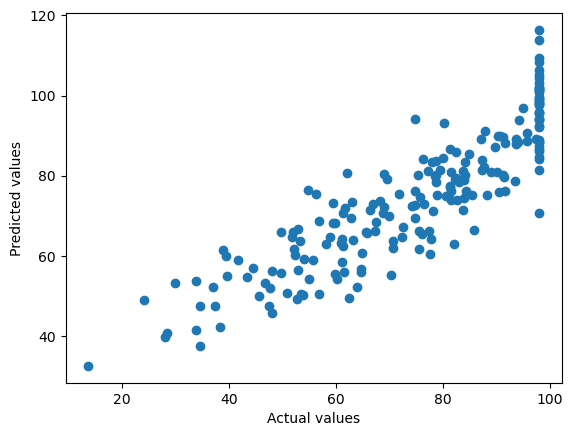

In [18]:
# Generate predicted values for the test data
y_pred = model.predict(X_test)

# Create a scatter plot of the predicted values versus the actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()